In [1]:
!pip install numpy pandas matplotlib seaborn wheel pandas_profiling jupyter notebook -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
!pip install graphviz pydotplus 

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [3]:
!pip install scikit-learn -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
!pip install pdpbox eli5 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
!pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("dataset5.csv")

In [18]:
df.shape

(49999, 2)

In [19]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [20]:
df.corr()

,Visitors with Patient,Stay
Visitors with Patient,1.000000,0.554307
Stay,0.554307,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Visitors with Patient  49999 non-null  float64
 1   Stay                   49999 non-null  float64
dtypes: float64(2)
memory usage: 781.4 KB


In [22]:
df.shape

(49999, 2)

# features are chosen according to correlation3

In [23]:
#切分训练集和测试集#
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [24]:
train, test = randSplit(df)

In [25]:
train.shape

(44999, 2)

In [26]:
train

,Visitors with Patient,Stay
0,0.06250,0.000000
1,0.06250,0.380952
2,0.06250,0.285714
3,0.06250,0.380952
4,0.06250,0.380952
...,...,...
44994,0.06250,0.190476
44995,0.18750,0.666667
44996,0.06250,0.190476
44997,0.09375,0.285714


In [27]:
test.shape

(5000, 2)

In [28]:
test

,Visitors with Patient,Stay
0,0.12500,0.285714
1,0.09375,0.285714
2,0.06250,0.380952
3,0.09375,0.285714
4,0.06250,0.190476
...,...,...
4995,0.18750,0.285714
4996,0.18750,0.285714
4997,0.12500,0.095238
4998,0.12500,0.285714


In [29]:
import numpy as np
def stayClass(train, test, k):
    train=pd.DataFrame(train,dtype=np.float)
    test=pd.DataFrame(test,dtype=np.float)
    n = train. shape[1]-1   
    m = test. shape[0]     
    result = []                
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) **2).sum(1))**.5)    
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   
        dr = dist_1.sort_values(by = 'dist')[: k] 
        re = dr.loc[:, 'labels'].value_counts()  
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result 
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()   
    print('accuracy{}'.format(acc))
    return acc, res

In [34]:
acc, df_stay = stayClass(train, test, 50)
df_stay.head()

accuracy0.314


,Hospital_region_Z,Hospital_region_X,Hospital_region_Y,Available Extra Rooms in Hospital,Department_anesthesia,Department_radiotherapy,Department_TB & Chest disease,Department_gynecology,Department_1,Ward_Type_S,...,patientid,Admission_emergency,Admission_urgent,Admission_trauma,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,predict
0,0.0,1.0,0.0,0.125000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.036886,0.0,0.0,1.0,0.333333,0.12500,0.47619,0.316601,35.0,25.0
1,0.0,0.0,1.0,0.125000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.036886,1.0,0.0,0.0,0.333333,0.09375,0.47619,0.534190,35.0,25.0
2,1.0,0.0,0.0,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.036886,0.0,0.0,1.0,0.333333,0.06250,0.47619,0.312945,45.0,15.0
3,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.036886,1.0,0.0,0.0,0.333333,0.09375,0.47619,0.354447,35.0,15.0
4,1.0,0.0,0.0,0.083333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.448364,0.0,0.0,1.0,0.333333,0.06250,0.47619,0.462451,25.0,25.0


accuracy0.2636
accuracy0.2706
accuracy0.2808
accuracy0.2844
accuracy0.3024
accuracy0.3086
accuracy0.307
accuracy0.3182
accuracy0.3186
accuracy0.3186
accuracy0.3224
accuracy0.3236
accuracy0.3272
accuracy0.331
accuracy0.3278
accuracy0.3294
accuracy0.3306
accuracy0.3372
accuracy0.335
accuracy0.3328
accuracy0.333
accuracy0.337
accuracy0.3346
accuracy0.3428
accuracy0.3396
accuracy0.3442
accuracy0.3376
accuracy0.3432
accuracy0.3412
26
0.3442


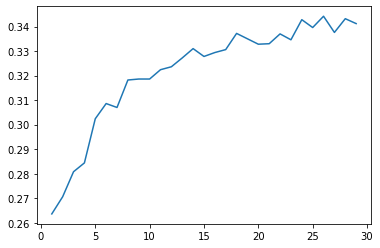

In [16]:
import matplotlib.pyplot as plt
score = []
krange = range(1,30)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

accuracy0.1348
accuracy0.2418
accuracy0.2678
accuracy0.2396
accuracy0.2466
accuracy0.2462
accuracy0.2748
accuracy0.2756
accuracy0.3016
accuracy0.3106
accuracy0.2846
accuracy0.2848
accuracy0.3108
accuracy0.2848
accuracy0.2858
accuracy0.3166
accuracy0.2886
accuracy0.29
accuracy0.316
accuracy0.3162
accuracy0.2906
accuracy0.2852
accuracy0.2852
accuracy0.278
accuracy0.278
accuracy0.278
accuracy0.278
accuracy0.2846
accuracy0.2846
16
0.3166


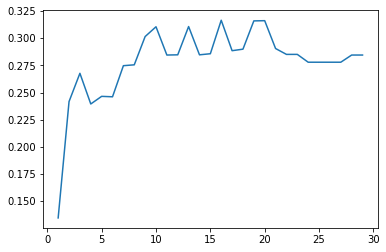

In [30]:
import matplotlib.pyplot as plt
score = []
krange = range(1,30)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))